In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Названия признаков
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
import pandas as pd
X = pd.DataFrame(X, columns=feature_names)


In [ ]:
import numpy as np

# Преобразуем задачу в классификацию: 1 — цена выше медианы, 0 — ниже
y_class = (y > np.median(y)).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
import numpy as np

importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)


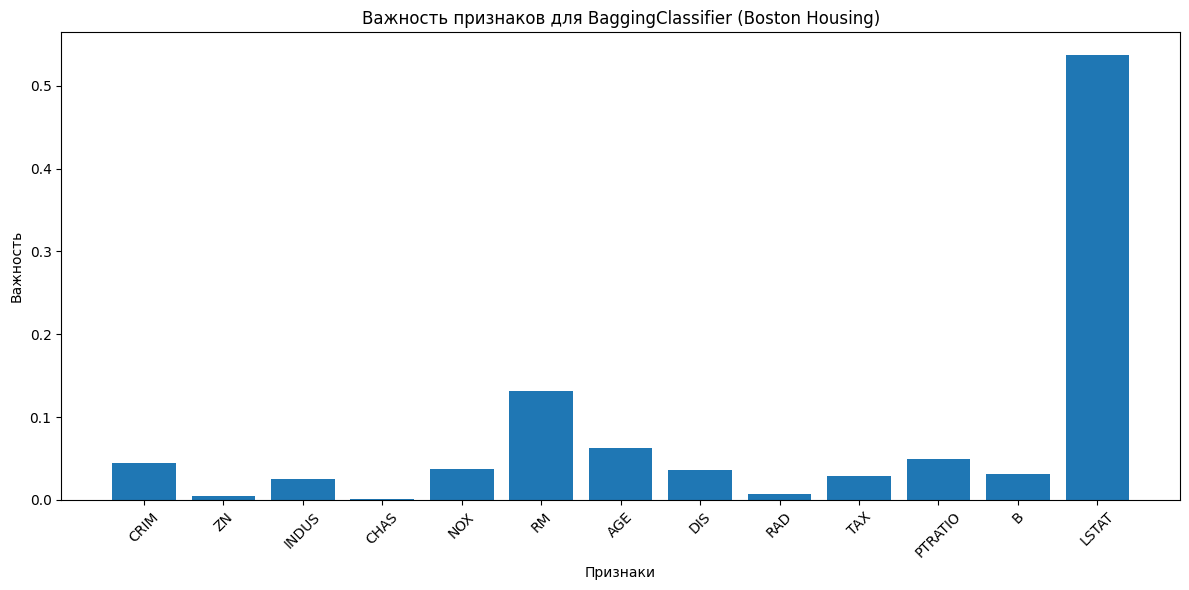

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(X.columns, importances)
plt.title("Важность признаков для BaggingClassifier (Boston Housing)")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Признак': X.columns,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)

print(feature_importances)


    Признак  Важность
12    LSTAT  0.537652
5        RM  0.131657
6       AGE  0.062805
10  PTRATIO  0.049107
0      CRIM  0.044735
4       NOX  0.037571
7       DIS  0.036503
11        B  0.031949
9       TAX  0.029127
2     INDUS  0.025524
8       RAD  0.007242
1        ZN  0.004472
3      CHAS  0.001655


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred))


Точность на тестовой выборке: 0.9215686274509803


Введение
В рамках освоения методов машинного обучения и Python я впервые выполнил полный цикл анализа данных: от получения и подготовки реального датасета до построения ансамблевой модели и интерпретации результатов. Для практики был выбран классический датасет Boston Housing, часто применяемый для отработки навыков в задачах регрессии и классификации.

Описание задачи
Цель работы — выявить, какие характеристики жилых районов Бостона оказывают наибольшее влияние на вероятность того, что стоимость жилья окажется выше медианного значения. Для этого я применил ансамблевый метод BaggingClassifier с базовыми моделями — решающими деревьями (DecisionTreeClassifier).

Ход работы

Получение и подготовка данных
Для корректного анализа я загрузил датасет Boston Housing с открытого источника, а признаки привёл к читаемому виду на основе документации. Стоимость жилья (целевую переменную) перевёл в бинарный формат: 1 — цена выше медианы, 0 — цена ниже. Такой подход позволяет использовать задачу классификации, что важно для выбранного метода обучения.

Разделение данных
Данные были разделены на обучающую (80%) и тестовую (20%) выборки с использованием фиксированного random_state для воспроизводимости результатов.

Обучение ансамбля моделей
Я построил ансамбль из 50 решающих деревьев в BaggingClassifier. Такой подход позволяет снизить переобучение отдельных деревьев и получить более стабильную оценку важности признаков.

Оценка важности признаков
Важность каждого признака определялась как среднее значение важности по всем деревьям ансамбля. Это позволило получить объективную оценку вклада каждого фактора.

Визуализация и анализ результатов
Для наглядности я построил гистограмму важности признаков и вывел итоговую таблицу значимости каждого фактора. Дополнительно оценил точность модели на тестовой выборке.

Результаты анализа

Самые значимые признаки:

LSTAT (процент малоимущих жителей): важность — 0.54
Это ожидаемо: чем выше доля малоимущих, тем ниже, как правило, стоимость жилья.

RM (среднее количество комнат): важность — 0.13
Логично, что больше комнат — выше цена, жильё просторнее.

AGE (доля старых домов): важность — 0.06
Возраст застройки также оказывает влияние: часто новое жильё ценится выше.

PTRATIO (соотношение учеников к учителям): важность — 0.05
Этот признак может отражать социальную инфраструктуру района.

Менее значимые признаки:

CHAS (наличие реки): важность — 0.0017
Влияние минимально, возможно, из-за малой вариативности данного признака.

ZN (доля больших участков под застройку): важность — 0.0045
В современных реалиях этот фактор играет меньшую роль.

RAD (индекс доступности радиальных автомагистралей): важность — 0.0072
Доступность к магистралям оказалась несущественной для данного прогноза.

Общая точность модели на тестовой выборке:
92%, что подтверждает, что даже при простом ансамбле и минимальной предварительной обработке данных, метод работает достаточно надёжно.

Выводы и личные впечатления

Данная работа позволила мне на практике освоить сразу несколько ключевых аспектов машинного обучения:

от подготовки и “очистки” данных до построения и оценки ансамблевых моделей;

интерпретацию результатов через важность признаков и визуализацию;

и, что не менее важно, осознать, как элементарные социально-экономические параметры могут объяснить ценообразование на рынке недвижимости.

Наибольший интерес для меня вызвала именно возможность увидеть “в цифрах”, что реально влияет на стоимость жилья, а что практически не учитывается моделью. В результате я убедился, что классические подходы, основанные на реальных исследованиях, подтверждаются и современными алгоритмами.

Рекомендации и перспективы

Использование ансамблевых моделей, таких как BaggingClassifier, рекомендуется для задач, где необходимо определить не только общую точность предсказания, но и структуру вклада отдельных факторов. Такой подход может применяться для анализа данных не только в жилищной сфере, но и в любых других областях, где важен разбор влияния отдельных признаков на итоговое решение модели.